<a href="https://colab.research.google.com/github/alblaine/Data-Cleaning-with-Python/blob/master/Data_Cleaning_with_Python_Solutions_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning with Python**  
An NCSU Libraries Workshop  
Instructor: Alison Blaine, ablaine@ncsu.edu



### Welcome! In this workshop, we'll learn how to do the following: 
* load in python libraries for data cleaning (pandas) and graphing (matplotlib)
* read csv files into Python 
* examine the first and last few rows of the data
* delete duplicates
* filter the data to create subsets
* sort the data
* group the data for plotting
* drop variables from the dataset
* create new variables
* generate and save summary statistics for a dataset

### Step 1. We'll start by loading in the required Python libraries.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Next, we'll load in population.csv. First, download the data file to your laptop from [go.ncsu.edu/popdata](https://go.ncsu.edu/popdata). This dataset is a CSV (comma separated values) file.

In [7]:
from google.colab import files
files.upload()

Saving population.csv to population.csv


{'population.csv': b'state/region,ages,year,population\nAL,under18,2012,1117489\nAL,total,2012,4817528\nAL,under18,2010,1130966\nAL,total,2010,4785570\nAL,under18,2011,1125763\nAL,total,2011,4801627\nAL,total,2009,4757938\nAL,under18,2009,1134192\nAL,under18,2013,1111481\nAL,total,2013,4833722\nAL,total,2007,4672840\nAL,under18,2007,1132296\nAL,total,2008,4718206\nAL,under18,2008,1134927\nAL,total,2005,4569805\nAL,under18,2005,1117229\nAL,total,2006,4628981\nAL,under18,2006,1126798\nAL,total,2004,4530729\nAL,under18,2004,1113662\nAL,total,2003,4503491\nAL,under18,2003,1113083\nAL,total,2001,4467634\nAL,under18,2001,1120409\nAL,total,2002,4480089\nAL,under18,2002,1116590\nAL,under18,1999,1121287\nAL,total,1999,4430141\nAL,total,2000,4452173\nAL,under18,2000,1122273\nAL,total,1998,4404701\nAL,under18,1998,1118252\nAL,under18,1997,1122893\nAL,total,1997,4367935\nAL,total,1996,4331103\nAL,total,1995,4296800\nAL,under18,1995,1110553\nAL,under18,1996,1112092\nAL,total,1994,4260229\nAL,total,

In [0]:
dat=pd.read_csv('population.csv')

### Step 3. Type dat.head() to see the first 5 rows of the dataset. Then click the run button.

In [6]:
dat.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


### Step 4. Rename the state/region column to state_region using rename().

In [9]:
dat.rename(columns={'state/region':'state_region'}, inplace=True)

dat.head()

,state_region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


### Step 5. Print out the unique values in the state_region column using drop_duplicates().

In [10]:
dat.state_region.drop_duplicates()  # note: this does not permanently delete duplicates

0        AL
48       AK
96       AZ
144      AR
192      CA
240      CO
288      CT
336      DE
384      DC
432      FL
480      GA
528      HI
576      ID
624      IL
672      IN
720      IA
768      KS
816      KY
864      LA
912      ME
960      MD
1008     MA
1056     MI
1104     MN
1152     MS
1200     MO
1248     MT
1296     NE
1344     NV
1392     NH
1440     NJ
1488     NM
1536     NY
1584     NC
1632     ND
1680     OH
1728     OK
1776     OR
1824     PA
1872     RI
1920     SC
1968     SD
2016     TN
2064     TX
2112     UT
2160     VT
2208     VA
2256     WA
2304     WV
2352     WI
2400     WY
2448     PR
2496    USA
Name: state_region, dtype: object

### Step 6. Another way to see unique values in a column is to use the unique() function. This prints out as an array of unique values.

In [11]:
dat.state_region.unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'PR', 'USA'],
      dtype=object)

### Step 7. To count the number of unique values in a column, use the len() function.

In [12]:
len(dat.state_region.unique())

53

### Step 8. Use value_counts() to count the number of observations of each unique value for state_region.

In [0]:
dat.state_region.value_counts()

### Step 9. Filter out all rows except for NC using query().

In [0]:
dat_filtered = dat.query('state_region == "NC"')   # note: we are creating a new dataset called dat_filtered that contains the filtered data

dat_filtered.head()

### Step 10. Order the columns by year using sort_values().

In [0]:

dat_sorted = dat_filtered.sort_values(['year'])   # note: ascending is the default sort order

dat_sorted.head()

### Step 11. Let's see what the mean population is for each category of ages (under18 and total)

In [0]:
age_means = dat_sorted.groupby(['ages']).mean()

age_means

### Step 12.  Since we don't need the year column, we can delete it.

In [0]:
age_means = age_means.drop(columns=['year'])
age_means


###Step 13. Get the population value for under18 from age_means.

In [18]:
age_means.population['under18']

2000739.625

### Step 14. Read in the drivers.csv dataset from a url.

In [0]:
url="https://raw.githubusercontent.com/alblaine/data-1/master/bad-drivers/bad-drivers.csv"

drivers = pd.read_csv(url)

### Step 15. Get info about the drivers dataset using .info().

In [20]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
State                                                                                                     51 non-null object
Number of drivers involved in fatal collisions per billion miles                                          51 non-null float64
Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                      51 non-null int64
Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                              51 non-null int64
Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                                51 non-null int64
Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents    51 non-null int64
Car Insurance Premiums ($)                                                                                51 non-null float64
Losses incurred by insura

### Step 16. Look at the data using the head() command.

In [21]:
drivers.head()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


### Step 17. Rename the columns to shorter names using rename()

In [0]:
drivers_renamed = drivers.rename(columns={'Number of drivers involved in fatal collisions per billion miles':'num_per_billion',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding':'pct_speeding',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired':'pct_alcohol_impaired',
       'Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted':'pct_not_distracted',
       'Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents':'pct_no_accidents',
       'Car Insurance Premiums ($)':'premiums',
       'Losses incurred by insurance companies for collisions per insured driver ($)':'losses'})
                       
                                 

In [34]:
drivers_renamed.head()


,State,num_per_billion,pct_speeding,pct_alcohol_impaired,pct_not_distracted,pct_no_accidents,premiums,losses
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


### Step 18. Create a new dataset keeping only the state, premiums, and losses columns using the .filter() function.

In [37]:
drivers_pl = drivers_renamed.filter(["State", "premiums", "losses"])
drivers_pl

,State,premiums,losses
0,Alabama,784.55,145.08
1,Alaska,1053.48,133.93
2,Arizona,899.47,110.35
3,Arkansas,827.34,142.39
4,California,878.41,165.63
5,Colorado,835.50,139.91
6,Connecticut,1068.73,167.02
7,Delaware,1137.87,151.48
8,District of Columbia,1273.89,136.05
9,Florida,1160.13,144.18


### Step 19. Create a new variable, ratio, that is the ratio of losses to premiums (ratio= losses/premiums)

In [39]:
drivers_pl = drivers_pl.assign(ratio=drivers_pl.losses/drivers_pl.premiums)
drivers_pl

,State,premiums,losses,ratio
0,Alabama,784.55,145.08,0.184921
1,Alaska,1053.48,133.93,0.127131
2,Arizona,899.47,110.35,0.122683
3,Arkansas,827.34,142.39,0.172106
4,California,878.41,165.63,0.188557
5,Colorado,835.50,139.91,0.167457
6,Connecticut,1068.73,167.02,0.156279
7,Delaware,1137.87,151.48,0.133126
8,District of Columbia,1273.89,136.05,0.106799
9,Florida,1160.13,144.18,0.124279


### Step 20. Create a scatter plot showing premiums = X, losses = Y.

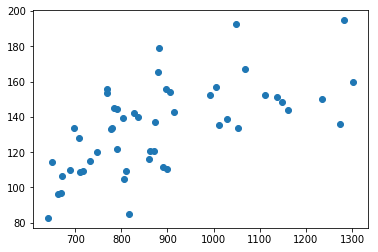

In [40]:
plt.scatter(drivers_pl.premiums, drivers_pl.losses)

### Step 21. Get summary statistics about the drivers_pl dataset.

In [41]:
drivers_pl.describe()

,premiums,losses,ratio
count,51.000000,51.000000,51.000000
mean,886.957647,134.493137,0.153809
std,178.296285,24.835922,0.024613
min,641.960000,82.750000,0.104324
25%,768.430000,114.645000,0.134411
50%,858.970000,136.050000,0.154258
75%,1007.945000,151.870000,0.171844
max,1301.520000,194.780000,0.202902


### Step 22. Save the summary statistics into their own dataset.

In [0]:
dpl_summary = drivers_pl.describe()


In [43]:
dpl_summary

,premiums,losses,ratio
count,51.000000,51.000000,51.000000
mean,886.957647,134.493137,0.153809
std,178.296285,24.835922,0.024613
min,641.960000,82.750000,0.104324
25%,768.430000,114.645000,0.134411
50%,858.970000,136.050000,0.154258
75%,1007.945000,151.870000,0.171844
max,1301.520000,194.780000,0.202902


### Step 23. Access the mean of the premiums column.

In [44]:
dpl_summary.premiums['mean']

886.9576470588232

In [45]:
dpl_summary.premiums[1]

886.9576470588232

### Step 24. Transpose columns and rows in dpl_summary using transpose()

In [46]:
dpl_summary.transpose()

,count,mean,std,min,25%,50%,75%,max
premiums,51.0,886.957647,178.296285,641.960000,768.430000,858.970000,1007.945000,1301.520000
losses,51.0,134.493137,24.835922,82.750000,114.645000,136.050000,151.870000,194.780000
ratio,51.0,0.153809,0.024613,0.104324,0.134411,0.154258,0.171844,0.202902


### Step 25. Practice. Read in a new dataset from the url provided using the read_csv() command. Name the dataset 'exdat'.

In [47]:
url = "https://raw.githubusercontent.com/alblaine/exchange-rates/master/data/annual.csv"

exdat =  pd.read_csv(url)

exdat.head()

,Date,Country,Exchange rate
0,1971-01-01,Australia,0.880282
1,1972-01-01,Australia,0.838715
2,1973-01-01,Australia,0.704722
3,1974-01-01,Australia,0.694975
4,1975-01-01,Australia,0.764701


### Step 26. Create a year column based on the Date column (ex: 1971)

Note that **.assign** creates a new column, **pd.DatetimeIndex()** converts the Date column into a Date object in Python, and **.year** extracts the year value.

In [53]:
# See how to convert a date to year using DatatimeIndex()
pd.DatetimeIndex(exdat['Date']).year



Int64Index([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
            ...
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='Date', length=825)

In [54]:
# Now do it on this dataset and 

exdat = exdat.assign(year=pd.DatetimeIndex(exdat['Date']).year)  # see the Pandas docs here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DatetimeIndex.html
exdat

,Date,Country,Exchange rate,year
0,1971-01-01,Australia,0.880282,1971
1,1972-01-01,Australia,0.838715,1972
2,1973-01-01,Australia,0.704722,1973
3,1974-01-01,Australia,0.694975,1974
4,1975-01-01,Australia,0.764701,1975
5,1976-01-01,Australia,0.818666,1976
6,1977-01-01,Australia,0.902364,1977
7,1978-01-01,Australia,0.874049,1978
8,1979-01-01,Australia,0.894694,1979
9,1980-01-01,Australia,0.877578,1980


### Step. 27. Delete the Date column using drop().

In [0]:
exdat = exdat.drop(columns=['Date'])
exdat.head()

### Step 28. Practice. Filter the data to only include China and Mexico using the query() function.

In [0]:
exdat_filtered = exdat.query('Country == "China" or Country == "Mexico"')

exdat_filtered

### Step 29. Practice. Rename the "Exchange rate" column to "rate". We shouldn't have spaces in our variable names.

In [0]:
exdat_filtered = exdat_filtered.rename(columns={'Exchange rate':'rate'})

exdat_filtered